In [1]:
import pandas as pd
df=pd.read_csv('mnist_train.csv')
df.shape

(60000, 785)

In [2]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
!pip install openTSNE

In [2]:
from openTSNE import TSNEEmbedding
from openTSNE import affinity
from openTSNE import initialization
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
x=df.drop(['label'],axis=1)
y=df["label"]

In [7]:
x.shape

(60000, 784)

In [4]:
x=x.to_numpy()
y=y.to_numpy()

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [10]:
x_test.shape

(18000, 784)

In [11]:
print("Data set contains %d samples with %d features" % x_train.shape)

Data set contains 42000 samples with 784 features


In [6]:
affinities_train = affinity.PerplexityBasedNN(
    x_train,
    perplexity=30,
    metric="euclidean",
    n_jobs=8,
    random_state=42,
    verbose=True,
)

===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 49.28 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 3.52 seconds


In [7]:
init_train = initialization.pca(x_train, random_state=42)

In [8]:
embedding_train = TSNEEmbedding(
    init_train,
    affinities_train,
    negative_gradient_method="fft",
    n_jobs=8,
    verbose=True,
)

In [9]:
embedding_train_1 = embedding_train.optimize(n_iter=250, exaggeration=12, momentum=0.5)

===> Running optimization with exaggeration=12.00, lr=3500.00 for 250 iterations...
Iteration   50, KL divergence 6.1939, 50 iterations in 7.7151 sec
Iteration  100, KL divergence 5.7168, 50 iterations in 7.8637 sec
Iteration  150, KL divergence 5.6099, 50 iterations in 7.5996 sec
Iteration  200, KL divergence 5.5649, 50 iterations in 7.5327 sec
Iteration  250, KL divergence 5.5422, 50 iterations in 7.3950 sec
   --> Time elapsed: 38.11 seconds


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

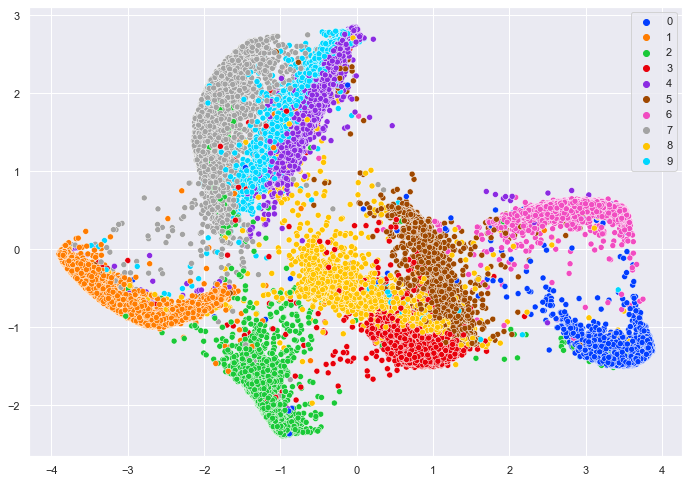

In [24]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)
sns.scatterplot(embedding_train_1[:,0], embedding_train_1[:,1], hue=y_train, legend='full', palette=palette)

In [10]:
embedding_train_2 = embedding_train_1.optimize(n_iter=500, momentum=0.8)

===> Running optimization with exaggeration=1.00, lr=3500.00 for 500 iterations...
Iteration   50, KL divergence 3.9290, 50 iterations in 6.8794 sec
Iteration  100, KL divergence 3.4357, 50 iterations in 6.8659 sec
Iteration  150, KL divergence 3.1876, 50 iterations in 8.2630 sec
Iteration  200, KL divergence 3.0286, 50 iterations in 10.4551 sec
Iteration  250, KL divergence 2.9162, 50 iterations in 13.3977 sec
Iteration  300, KL divergence 2.8334, 50 iterations in 16.9344 sec
Iteration  350, KL divergence 2.7704, 50 iterations in 20.2569 sec
Iteration  400, KL divergence 2.7226, 50 iterations in 23.6684 sec
Iteration  450, KL divergence 2.6842, 50 iterations in 27.0088 sec
Iteration  500, KL divergence 2.6537, 50 iterations in 30.3776 sec
   --> Time elapsed: 164.11 seconds


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

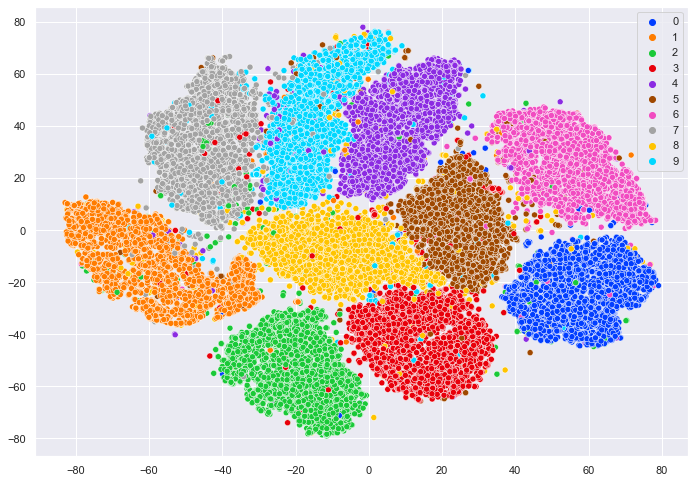

In [26]:
sns.scatterplot(embedding_train_2[:,0], embedding_train_2[:,1], hue=y_train, legend='full', palette=palette)

In [11]:
embedding_test = embedding_train_2.prepare_partial(
    x_test,
    initialization="median",
    k=25,
    perplexity=5,
)

===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 8.35 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.25 seconds


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

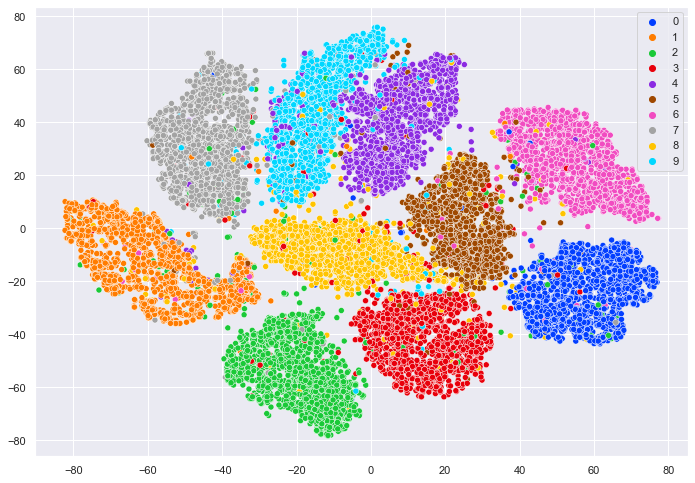

In [29]:
sns.scatterplot(embedding_test[:,0], embedding_test[:,1], hue=y_test, legend='full', palette=palette)

In [12]:
embedding_test_1 = embedding_test.optimize(n_iter=250, learning_rate=0.1, momentum=0.8)

===> Running optimization with exaggeration=1.00, lr=0.10 for 250 iterations...
Iteration   50, KL divergence 258613.3537, 50 iterations in 1.0098 sec
Iteration  100, KL divergence 255416.4237, 50 iterations in 1.0161 sec
Iteration  150, KL divergence 254051.1029, 50 iterations in 1.0607 sec
Iteration  200, KL divergence 253202.0613, 50 iterations in 1.0494 sec
Iteration  250, KL divergence 252585.8857, 50 iterations in 1.0583 sec
   --> Time elapsed: 5.20 seconds


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

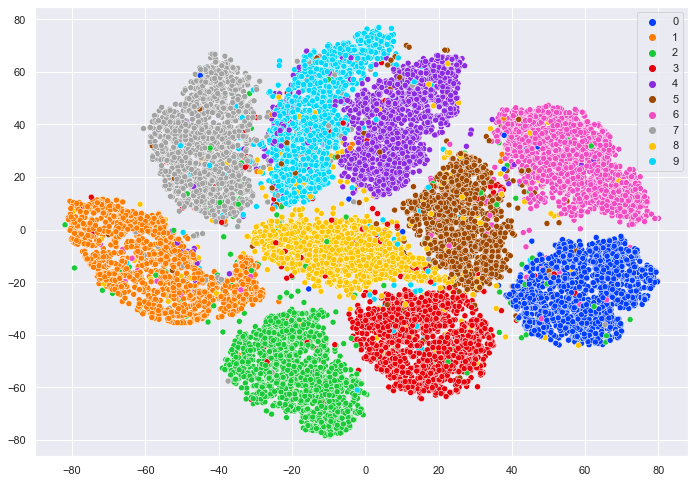

In [31]:
sns.scatterplot(embedding_test_1[:,0], embedding_test_1[:,1], hue=y_test, legend='full', palette=palette)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

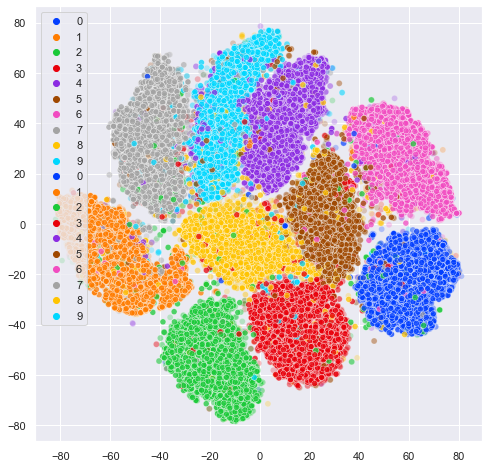

In [32]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(embedding_train_2[:,0], embedding_train_2[:,1], hue=y_train, legend='full', palette=palette, alpha=0.25, ax=ax)
sns.scatterplot(embedding_test_1[:,0], embedding_test_1[:,1], hue=y_test, legend='full', palette=palette, alpha=0.75, ax=ax)

In [13]:
from sklearn.manifold import TSNE
x=df.drop(['label'],axis=1)
y=df["label"]
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 60000 samples in 0.126s...
[t-SNE] Computed neighbors for 60000 samples in 313.386s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60000
[t-SNE] Computed conditional probabilities for sample 2000 / 60000
[t-SNE] Computed conditional probabilities for sample 3000 / 60000
[t-SNE] Computed conditional probabilities for sample 4000 / 60000
[t-SNE] Computed conditional probabilities for sample 5000 / 60000
[t-SNE] Computed conditional probabilities for sample 6000 / 60000
[t-SNE] Computed conditional probabilities for sample 7000 / 60000
[t-SNE] Computed conditional probabilities for sample 8000 / 60000
[t-SNE] Computed conditional probabilities for sample 9000 / 60000
[t-SNE] Computed conditional probabilities for sample 10000 / 60000
[t-SNE] Computed conditional probabilities for sample 11000 / 60000
[t-SNE] Computed conditional probabilities for sample 12000 / 60000
[t-SNE] Computed conditional probabilities for s

[Text(0.5, 1.0, 'T-SNE projection')]

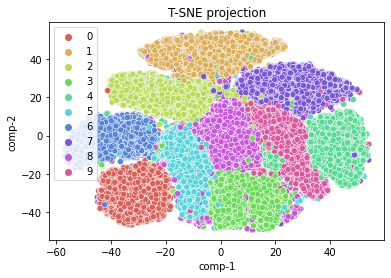

In [5]:
import seaborn as sns
df1 = pd.DataFrame()
df1["y"] = y
df1["comp-1"] = z[:,0]
df1["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df1.y.tolist(),palette=sns.color_palette("hls", 10),data=df1).set(title="T-SNE projection") 

In [13]:
new=np.concatenate((embedding_train_2,embedding_test_1), axis=0, out=None, dtype=None, casting="same_kind")

In [16]:
from sklearn.cluster import KMeans
kmeans_tsne_embedding = KMeans(n_clusters=10, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(new)

In [17]:
from sklearn.metrics import silhouette_score
print('KMeans tSNE_embedding Scaled Silhouette Score: {}'.format(silhouette_score(new, kmeans_tsne_embedding.labels_, metric='euclidean')))

KMeans tSNE_embedding Scaled Silhouette Score: 0.4224791518698162


In [34]:
kmeans_tsne = KMeans(n_clusters=10, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(z)

In [43]:
print('KMeans tSNE Scaled Silhouette Score: {}'.format(silhouette_score(z, kmeans_tsne.labels_, metric='euclidean'))) 

KMeans tSNE Scaled Silhouette Score: 0.4349843944686536
